# Sonyc Data Analysis

**Ref from Charlie**

**Cowork by Xurui Chen and Pingzi Li**

[Data Explore](#Data_Explore)

[Data Explore](#Data_Explore)

[Time Series Analysis](#Time_Series_Analysis)

[Compare Some Specific Period](#Compare_Some_Specific_Period)

## Data_Clean

In [2]:
import pandas as pd
import numpy as np
import utils
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
#from complaintdata import return_complaint_data
import ipywidgets as widgets
import matplotlib.dates as mdates
import matplotlib

In [3]:
# Style settings
sns.set(style="darkgrid")
from IPython.core.display import display, HTML
from IPython.display import IFrame
display(HTML('<style>.container { width:100% !important; }</style>'))
sns.set(font_scale=1.5)

In [4]:
# Timezone setting
matplotlib.rcParams['timezone'] = 'America/New_York'

In [6]:
# Load csv into dataframe
df = pd.read_csv('sonycnode-b827eb491436.sonyc.csv')

In [7]:
df.head()

,timestamp,dBAS
0,1554995649,64.35
1,1554995650,65.92
2,1554995651,69.24
3,1554995652,71.78
4,1554995653,70.70


In [8]:
# Create index and localize timestamps
df['time'] = pd.to_datetime(df['timestamp'].values.astype(np.int64), unit='s')
df['time'] = df['time'].dt.tz_localize('UTC').dt.tz_convert('America/New_York')
df.set_index(pd.DatetimeIndex(df['time']), inplace=True)
df.drop(['time', 'timestamp'], axis=1, inplace=True)

In [9]:
df.head()

,dBAS
time,
2019-04-11 11:14:09-04:00,64.35
2019-04-11 11:14:10-04:00,65.92
2019-04-11 11:14:11-04:00,69.24
2019-04-11 11:14:12-04:00,71.78
2019-04-11 11:14:13-04:00,70.70


In [10]:
# Create extra columns
df['weekday'] = df.index.weekday
df['min_of_day'] = (df.index.hour * 60.0) + df.index.minute
df['hour_of_day'] = df.index.hour

In [11]:
df.head()

,dBAS,weekday,min_of_day,hour_of_day
time,,,,
2019-04-11 11:14:09-04:00,64.35,3,674.0,11
2019-04-11 11:14:10-04:00,65.92,3,674.0,11
2019-04-11 11:14:11-04:00,69.24,3,674.0,11
2019-04-11 11:14:12-04:00,71.78,3,674.0,11
2019-04-11 11:14:13-04:00,70.70,3,674.0,11


In [12]:
def calc_leq(data):
    return 10 * np.log10(np.mean(10 ** (data / 10)))

def calcbg(data, stat_value=90):
    stat_percentile = 100 - stat_value
    return np.nanpercentile(data, stat_percentile)

In [13]:
# Print high level information
print('')
print('Start: \t %s' % df.index[0])
print('End: \t %s' % df.index[-1])
print('')
print('Total avg SPL: \t %0.2f dBA' % calc_leq(df['dBAS']))
print('Total max SPL: \t %0.2f dBA' % df['dBAS'].max())
print('Total min SPL: \t %0.2f dBA' % df['dBAS'].min())


Start: 	 2019-04-11 11:14:09-04:00
End: 	 2019-04-23 09:02:06-04:00

Total avg SPL: 	 67.22 dBA
Total max SPL: 	 107.73 dBA
Total min SPL: 	 41.88 dBA


In [14]:
# Weekday information (monday = 0, sunday = 6)
wkday_df = df.loc[df['weekday'] < 5]
print('')
print('Weekday avg SPL: \t %0.2f dBA' % calc_leq(wkday_df['dBAS']))
print('Weekday max SPL: \t %0.2f dBA' % wkday_df['dBAS'].max())
print('Weekday min SPL: \t %0.2f dBA' % wkday_df['dBAS'].min())


Weekday avg SPL: 	 67.80 dBA
Weekday max SPL: 	 107.73 dBA
Weekday min SPL: 	 42.80 dBA


In [15]:
# Weekend information (monday = 0, sunday = 6)
wkend_df = df.loc[df['weekday'] > 4]
print('')
print('Weekend avg SPL: \t %0.2f dBA' % calc_leq(wkend_df['dBAS']))
print('Weekend max SPL: \t %0.2f dBA' % wkend_df['dBAS'].max())
print('Weekend min SPL: \t %0.2f dBA' % wkend_df['dBAS'].min())


Weekend avg SPL: 	 65.78 dBA
Weekend max SPL: 	 107.25 dBA
Weekend min SPL: 	 41.88 dBA


**No notable gap between weekday and weekend, their average, max and min SPL does not has much difference**

In [16]:
# Day time period information (morning 05-12, afternoon 12-17, evening 17-21, night 21-04)
morning_df = df.between_time('05:00', '12:00')
print ''
print 'Morning avg SPL: \t %0.2f dBA' % calc_leq(morning_df['dBAS'])
print 'Morning max SPL: \t %0.2f dBA' % morning_df['dBAS'].max()
print 'Morning min SPL: \t %0.2f dBA' % morning_df['dBAS'].min()
afternoon_df = df.between_time('12:00', '17:00')
print ''
print 'Afternoon avg SPL: \t %0.2f dBA' % calc_leq(afternoon_df['dBAS'])
print 'Afternoon max SPL: \t %0.2f dBA' % afternoon_df['dBAS'].max()
print 'Afternoon min SPL: \t %0.2f dBA' % afternoon_df['dBAS'].min()
evening_df = df.between_time('17:00', '21:00')
print ''
print 'Evening avg SPL: \t %0.2f dBA' % calc_leq(evening_df['dBAS'])
print 'Evening max SPL: \t %0.2f dBA' % evening_df['dBAS'].max()
print 'Evening min SPL: \t %0.2f dBA' % evening_df['dBAS'].min()
night_df = df.between_time('21:00', '05:00')
print ''
print 'Night avg SPL: \t\t %0.2f dBA' % calc_leq(night_df['dBAS'])
print 'Night max SPL: \t\t %0.2f dBA' % night_df['dBAS'].max()
print 'Night min SPL: \t\t %0.2f dBA' % night_df['dBAS'].min()


Morning avg SPL: 	 69.43 dBA
Morning max SPL: 	 107.34 dBA
Morning min SPL: 	 43.62 dBA

Afternoon avg SPL: 	 68.32 dBA
Afternoon max SPL: 	 107.73 dBA
Afternoon min SPL: 	 46.06 dBA

Evening avg SPL: 	 67.16 dBA
Evening max SPL: 	 104.49 dBA
Evening min SPL: 	 46.35 dBA

Night avg SPL: 		 61.38 dBA
Night max SPL: 		 93.96 dBA
Night min SPL: 		 41.88 dBA


**No notable gap among these four day time interval, but night time is the quiest time in a day**

In [17]:
df.index.to_series().diff().median()

C:\Users\sherr\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default of the 'keep_tz' keyword will change to True in a future release. You can set 'keep_tz=True' to obtain the future behaviour and silence this warning.
  """Entry point for launching an IPython kernel.


Timedelta('0 days 00:00:01')

## Data_Explore

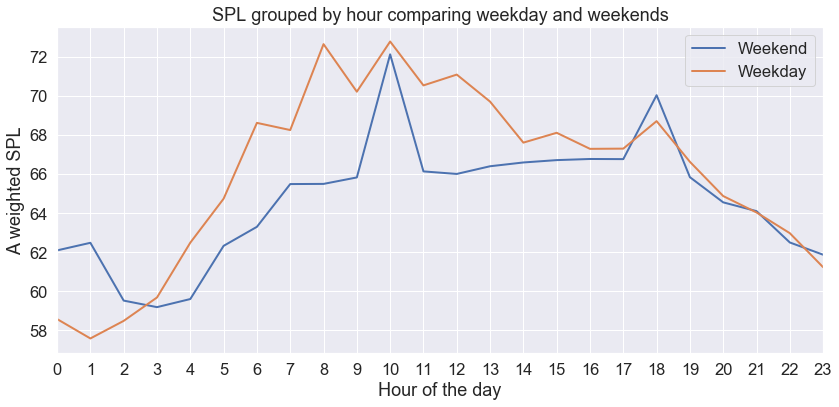

In [54]:
# Plot weekend vs weekday
wkend_gb = wkend_df.groupby(wkend_df['hour_of_day'])['dBAS'].apply(calc_leq)
wkday_gb = wkday_df.groupby(wkday_df['hour_of_day'])['dBAS'].apply(calc_leq)

plt.figure(figsize=(12,6))
ax = sns.lineplot(x=wkend_gb.index, y=wkend_gb, linewidth=2)
ax = sns.lineplot(x=wkday_gb.index, y=wkday_gb, linewidth=2)
plt.xlim([wkend_gb.index.min(), wkend_gb.index.max()])
plt.title('SPL grouped by hour comparing weekday and weekends')
plt.xlabel('Hour of the day')
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.ylabel('A weighted SPL')
plt.legend(['Weekend', 'Weekday'])
plt.tight_layout()
plt.savefig('wkend_wkday_byhour.pdf', format='pdf', dpi=1000, bbox_inches='tight')

**This is the figure about the noise change in hour of the day. The orange line is weekday and the blue line is weekend.**

**Weekdays are noiser than weekends in most of time in a day. But during midnight and during 5p.m. to 7p.m., weekend are noiser than weekdays. This observation makes sense since people need to work on weekdays, the sounds are higher in weekdays might due to people commute and work in open space. But during weekend, people get up late than weekdays, and they tends to party at night, so this explains the two time intervals that has higher SPL than weekdays.**

## Time_Series_Analysis

In [59]:
# Resample data into LAeq bins
df_10min = df.resample('600s').apply(calc_leq)

In [60]:
df_10min.head()

,dBAS,weekday,min_of_day,hour_of_day
time,,,,
2019-04-11 11:10:00-04:00,67.576597,3.0,676.932335,11.0
2019-04-11 11:20:00-04:00,67.368792,3.0,685.410678,11.0
2019-04-11 11:30:00-04:00,66.860066,3.0,695.410678,11.0
2019-04-11 11:40:00-04:00,66.819206,3.0,705.410678,11.0
2019-04-11 11:50:00-04:00,65.190497,3.0,715.410678,11.0


In [46]:
resamp_str = '300s'
df_5min = df.resample(resamp_str).apply(calc_leq).round(1)
#df_5min.index = df_5min.index.tz_localize(None)

In [47]:
df_5min.head()

,dBAS,weekday,min_of_day,hour_of_day
time,,,,
2019-04-11 11:10:00-04:00,66.6,3.0,674.0,11.0
2019-04-11 11:15:00-04:00,67.7,3.0,677.2,11.0
2019-04-11 11:20:00-04:00,65.8,3.0,682.2,11.0
2019-04-11 11:25:00-04:00,68.5,3.0,687.2,11.0
2019-04-11 11:30:00-04:00,68.0,3.0,692.2,11.0


In [48]:
df_5min['ts'] = df_5min.index.round('S')
df_5min['dBAS'].to_json('spl_%s.json' % resamp_str, orient='values')
df_5min['ts'].to_json('ts_%s.json' % resamp_str, orient='values', date_unit='s')
df_5min[['ts', 'dBAS']].to_json('both_%s.json' % resamp_str, orient='records', date_unit='s')

In [49]:
df_5min.head()

,dBAS,weekday,min_of_day,hour_of_day,ts
time,,,,,
2019-04-11 11:10:00-04:00,66.6,3.0,674.0,11.0,2019-04-11 11:10:00-04:00
2019-04-11 11:15:00-04:00,67.7,3.0,677.2,11.0,2019-04-11 11:15:00-04:00
2019-04-11 11:20:00-04:00,65.8,3.0,682.2,11.0,2019-04-11 11:20:00-04:00
2019-04-11 11:25:00-04:00,68.5,3.0,687.2,11.0,2019-04-11 11:25:00-04:00
2019-04-11 11:30:00-04:00,68.0,3.0,692.2,11.0,2019-04-11 11:30:00-04:00


In [78]:
df_1min = df.resample('60s').apply(calc_leq)
df_1h = df.resample('3600s').apply(calc_leq)

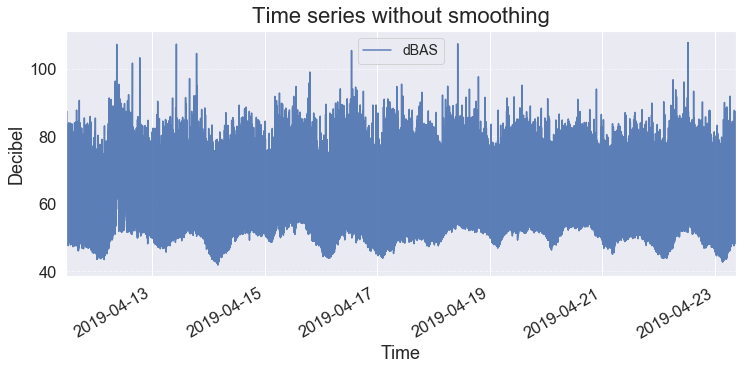

In [36]:
fig = plt.figure(figsize = (12,5))
ax = fig.add_subplot(111)

df.plot(y='dBAS', ax=ax, alpha=0.9)

ax.set_title("Time series without smoothing", fontsize=22, y=1.01)
ax.set_xlabel("Time", fontsize=18)
ax.set_ylabel("Decibel", fontsize=18)


plt.grid(linewidth=0.5, axis='y', linestyle='-.')
plt.legend(fontsize=14)
plt.show()

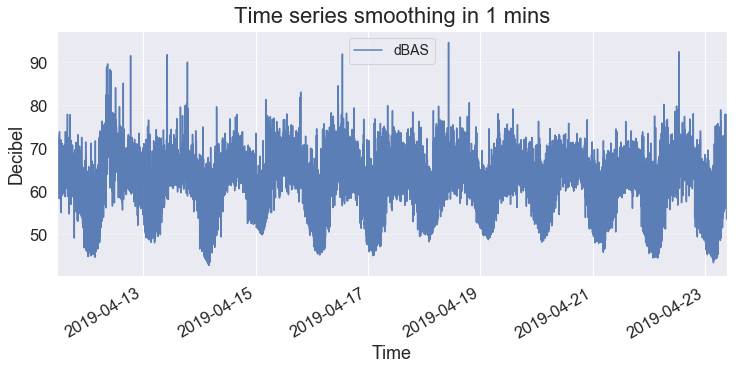

In [79]:
fig = plt.figure(figsize = (12,5))
ax = fig.add_subplot(111)

df_1min.plot(y='dBAS', ax=ax, alpha=0.9)

ax.set_title("Time series smoothing in 1 mins", fontsize=22, y=1.01)
ax.set_xlabel("Time", fontsize=18)
ax.set_ylabel("Decibel", fontsize=18)


plt.grid(linewidth=0.5, axis='y', linestyle='-.')
plt.legend(fontsize=14)
plt.show()

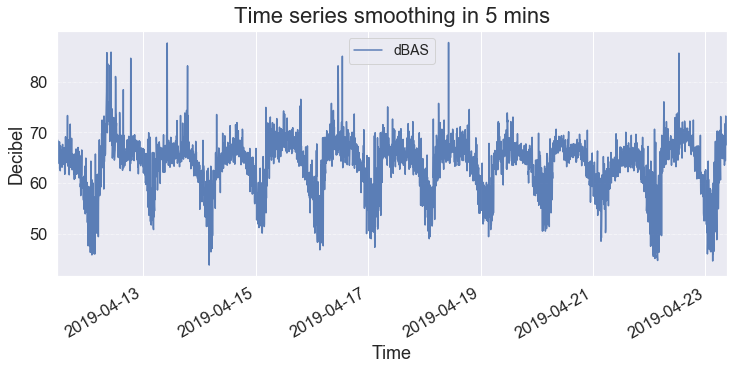

In [50]:
fig = plt.figure(figsize = (12,5))
ax = fig.add_subplot(111)

df_5min.plot(y='dBAS', ax=ax, alpha=0.9)

ax.set_title("Time series smoothing in 5 mins", fontsize=22, y=1.01)
ax.set_xlabel("Time", fontsize=18)
ax.set_ylabel("Decibel", fontsize=18)


plt.grid(linewidth=0.5, axis='y', linestyle='-.')
plt.legend(fontsize=14)
plt.show()

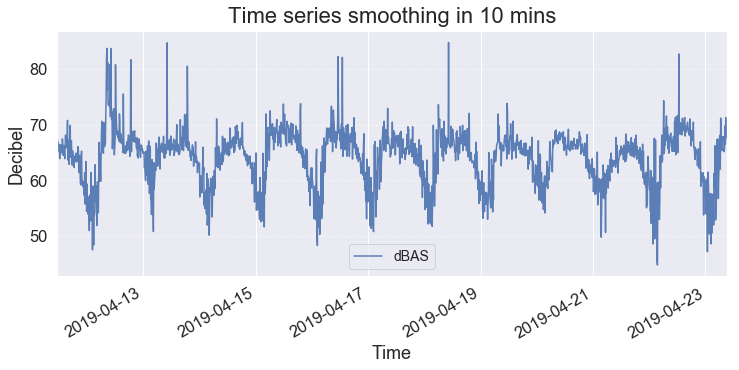

In [61]:
fig = plt.figure(figsize = (12,5))
ax = fig.add_subplot(111)

df_10min.plot(y='dBAS', ax=ax, alpha=0.9)

ax.set_title("Time series smoothing in 10 mins", fontsize=22, y=1.01)
ax.set_xlabel("Time", fontsize=18)
ax.set_ylabel("Decibel", fontsize=18)


plt.grid(linewidth=0.5, axis='y', linestyle='-.')
plt.legend(fontsize=14)
plt.show()

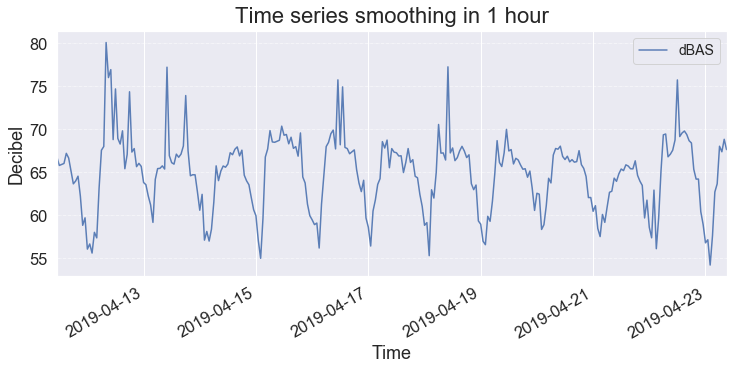

In [80]:
fig = plt.figure(figsize = (12,5))
ax = fig.add_subplot(111)

df_1h.plot(y='dBAS', ax=ax, alpha=0.9)

ax.set_title("Time series smoothing in 1 hour", fontsize=22, y=1.01)
ax.set_xlabel("Time", fontsize=18)
ax.set_ylabel("Decibel", fontsize=18)


plt.grid(linewidth=0.5, axis='y', linestyle='-.')
plt.legend(fontsize=14)
plt.show()

Abnormal value count

In [82]:
print('The number of times that decibel higer than 80, when without smoothing: %i' %len(df.dBAS>90))
print('The number of times that decibel higer than 80, when smoothing by 1 min: %i' %len(df_1min.dBAS>90))
print('The number of times that decibel higer than 80, when smoothing by 5 mins: %i' %len(df_5min.dBAS>90))
print('The number of times that decibel higer than 80, when smoothing by 10 mins: %i' %len(df_10min.dBAS>90))
print('The number of times that decibel higer than 80, when smoothing by 1 hour: %i' %len(df_1h.dBAS>90))

The number of times that decibel higer than 80, when without smoothing: 1028460
The number of times that decibel higer than 80, when smoothing by 1 min: 17149
The number of times that decibel higer than 80, when smoothing by 5 mins: 3431
The number of times that decibel higer than 80, when smoothing by 10 mins: 1716
The number of times that decibel higer than 80, when smoothing by 1 hour: 287


**As we smoothing more generally, the number of abnormals are getting fewer.**

## Compare_Some_Specific_Period

(50, 90)

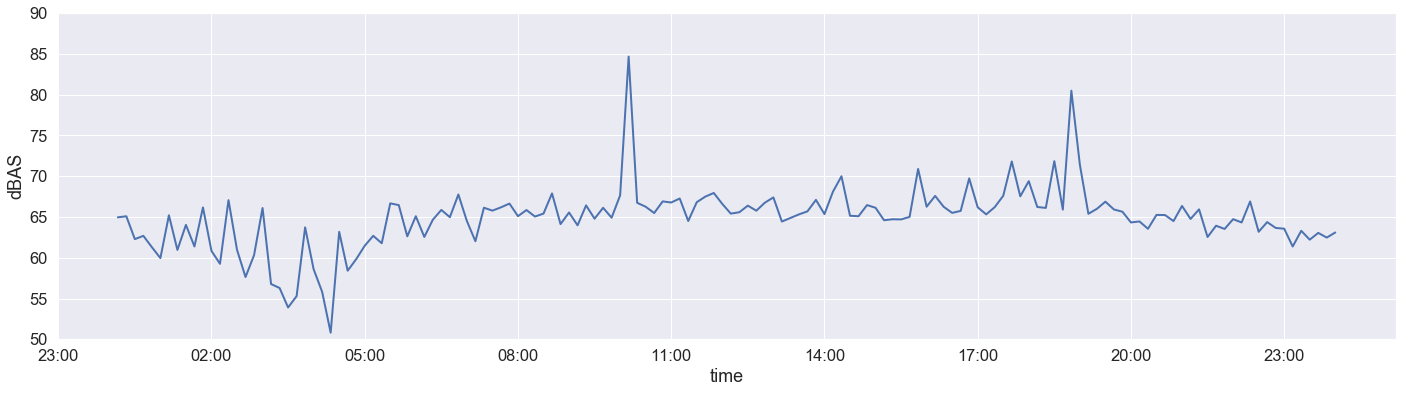

In [72]:
# Complaint 1
start_date = ' 2019-04-13T00:00:00'
end_date = '2019-04-14T00:00:00'

mask = (df_10min.index > start_date) & (df_10min.index <= end_date)
df_10min_focus = df_10min.loc[mask]

plt.figure(figsize=(24,6))
ax = sns.lineplot(x=df_10min_focus.index, y='dBAS', data=df_10min_focus, linewidth=2)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.set_ylim([50, 90])

**Example of plotting a specific time slot**